In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv("data.csv")

Displaying and understanding the data:

In [5]:
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [8]:
data.shape

(944, 10)

In [9]:
data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


Checking the data for missing values:

In [11]:
data.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

We can see that there is no missing data so we proceed with further data analysis:

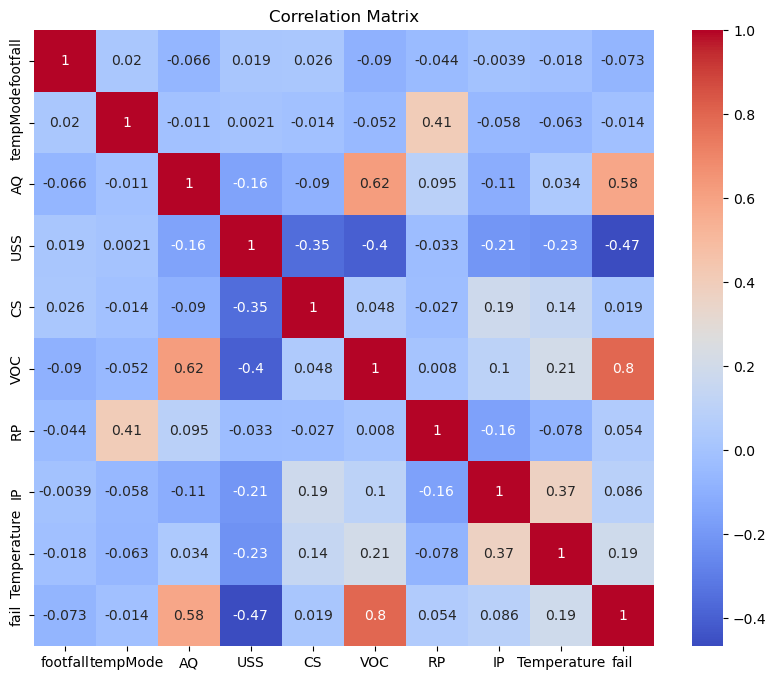

In [28]:
# Correlations matrix of the features and its target
corr_matrix =  data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

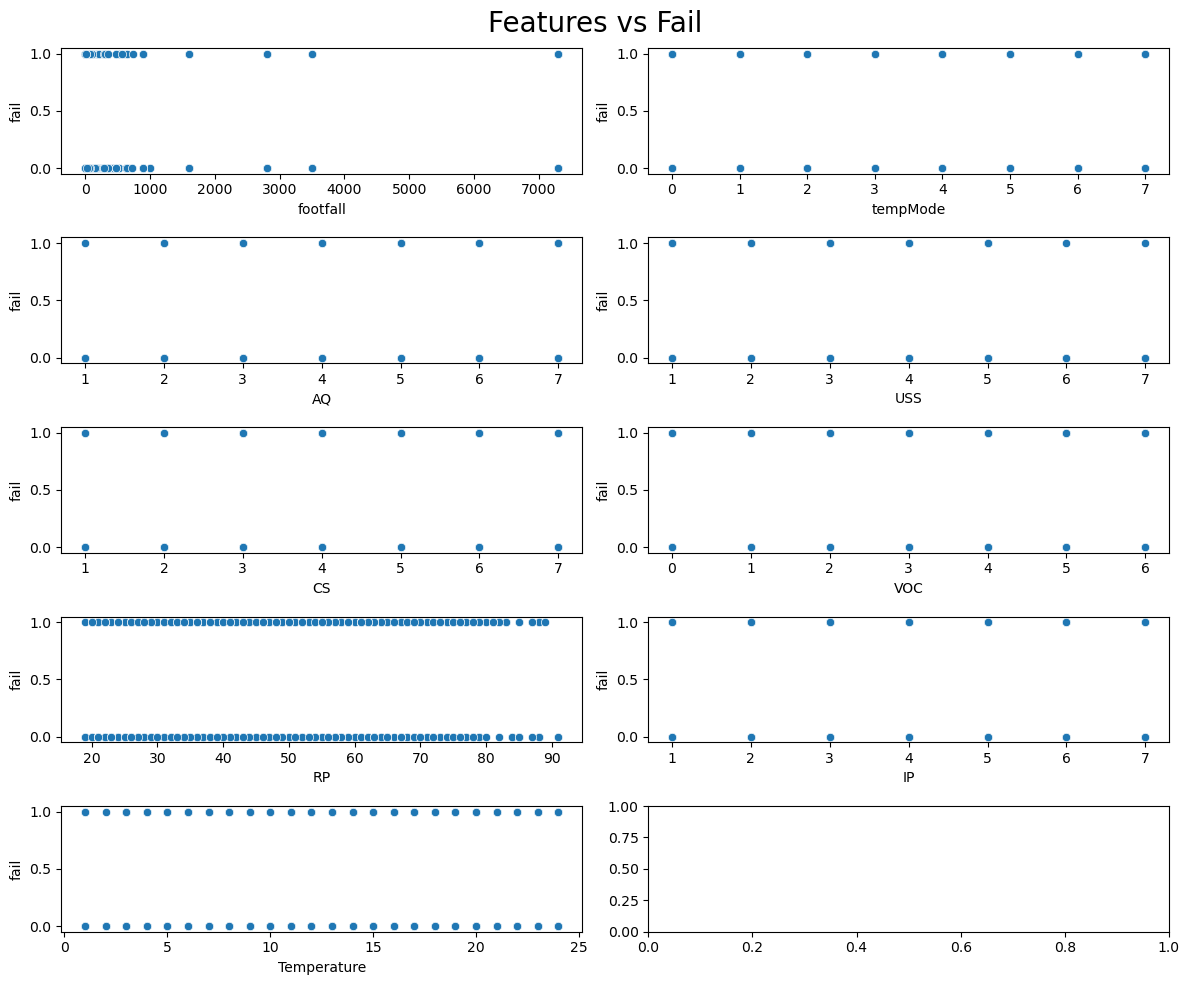

In [41]:
# Relationship between features and its target:

fig, axes = plt.subplots(5, 2, figsize=(12, 10))

for i, feature in enumerate(data.columns[:-1]):
    row, col = divmod(i, 2)
    sns.scatterplot(data=data, x=feature, y="fail", ax=axes[row, col])
    
plt.suptitle("Features vs Fail", fontsize=20)
plt.tight_layout()
plt.show()

For this task we need to predict if the machine will fail or not; represented by binary values 1 and 0. This gives us a perfect layout to use classification models for solving this problem:

In [45]:
# Preprocessing data
X = data.drop(columns=["fail"])
y = data["fail"]

In [54]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Standardize the feautres
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Establishing the models
models = {
    "LogisticRegression" : LogisticRegression(), 
    "RandomForest" : RandomForestClassifier(),
    "GradientBoosting" : GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

params = {
    "LogisticRegression": {'C': [0.01, 0.1, 1, 10]},
    "RandomForest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "GradientBoosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    "SVM": {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

In [59]:
top_models = {}
top_accuracy = 0
top_model = None
top_model_name = ""

for model_name in models.keys():
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    top_models[model_name] = grid_search.best_estimator_
    
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy for {model_name}: {accuracy}")
    if accuracy > top_accuracy:
        top_accuracy = accuracy
        top_model = grid_search.best_estimator_
        top_model_name = model_name
        
print(f"\nThe best performing model: {top_model_name} with an accuracy of: {top_accuracy}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best parameters for LogisticRegression: {'C': 0.01}
Accuracy for LogisticRegression: 0.8943661971830986
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best parameters for RandomForest: {'max_depth': 20, 'n_estimators': 200}
Accuracy for RandomForest: 0.8838028169014085
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best parameters for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy for GradientBoosting: 0.8802816901408451
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Accuracy for SVM: 0.8838028169014085

The best performing model: LogisticRegression with an accuracy of: 0.8943661971830986


In [61]:
# Evaluating the model using a confusion matrix
y_pred = top_model.predict(X_test)
y_prob = top_model.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

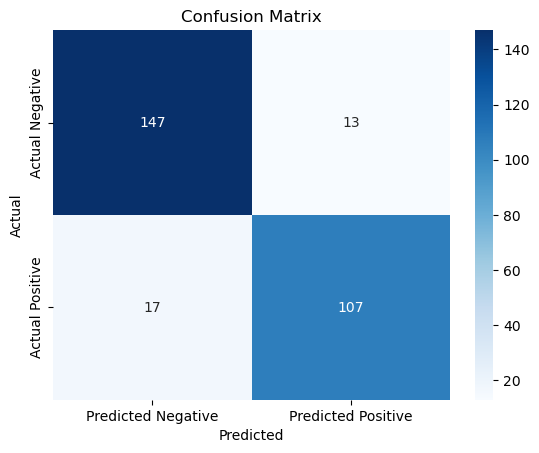

In [62]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
# Print classification report
report_df = pd.DataFrame(report).transpose()
print(f'Classification Report for {top_model_name}')
print(report_df)

Classification Report for LogisticRegression
              precision    recall  f1-score     support
0              0.896341  0.918750  0.907407  160.000000
1              0.891667  0.862903  0.877049  124.000000
accuracy       0.894366  0.894366  0.894366    0.894366
macro avg      0.894004  0.890827  0.892228  284.000000
weighted avg   0.894300  0.894366  0.894152  284.000000
